## Import dependencies

In [6]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

## Extract and Save Pitch-class-profiles (PCP) Features

In [ ]:
def roman_to_chords(input_str):
    # Lookup tables for scales and roman numerals
    sharp_scale = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    flat_scale = ['A', 'Bb', 'B', 'C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab']
    roman_map = {
        'I': 0,  'ii': 1, 'iii': 2, 'IV': 3, 'V': 4, 'vi': 5, 'vii': 6
    }
    
    # Parse the input string
    parts = input_str.split('-')
    root_note = parts[0]
    chord_progression = parts[2:-1]  # Skip the root octave and final number
    
    # Determine if the scale uses sharps or flats
    if root_note in sharp_scale:
        scale = sharp_scale
    elif root_note in flat_scale:
        scale = flat_scale
    else:
        raise ValueError("Invalid root note")
    
    root_index = scale.index(root_note)
    major_scale = [scale[(root_index + i) % 12] for i in [0, 2, 4, 5, 7, 9, 11]]
    minor_scale = [note.lower() for note in major_scale]
    chords = []
    for roman in chord_progression:
        is_major = roman.isupper()
        scale_index = roman_map[roman]
        chord = major_scale[scale_index] if is_major else minor_scale[scale_index]
        chords.append(chord)
    
    return '-'.join(chords)


def load_features(dataset_path, sr=16000, n_fft=4096, hop_length=2048):
    features = []
    labels = []

    for progression in os.listdir(dataset_path):
        progression_path = os.path.join(dataset_path, progression)
        if not os.path.isdir(progression_path):
            continue 

        for file_name in os.listdir(progression_path):
            if file_name.endswith('.wav'):
                file_name.split('-')

                label = roman_to_chords(file_name)

                file_path = os.path.join(progression_path, file_name)
                y, sr = librosa.load(file_path, sr=sr)
                chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

                features.append(chroma.T)  # Transpose for time-frame first
                labels.append(label)

    # Convert lists to NumPy arrays
    features = np.array(features, dtype=object)  # Variable-length arrays
    labels = np.array(labels)
    
    return features, labels

dataset_path = 'progressions'
features, labels = load_features(dataset_path)

np.save('features.npy', features)
np.save('labels.npy', labels)

print(f"Number of files: {len(features)}")
print(f"First file's feature shape: {features[0].shape}")
print(f"First file's label: {labels[0]}")

/Users/loewe/machine learning/AutomaticChordRecognition/.venv/lib/python3.12/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Number of files: 22950
First file's feature shape: (63, 12)
First file's label: f#-B-E


## Visualize one example feature + label

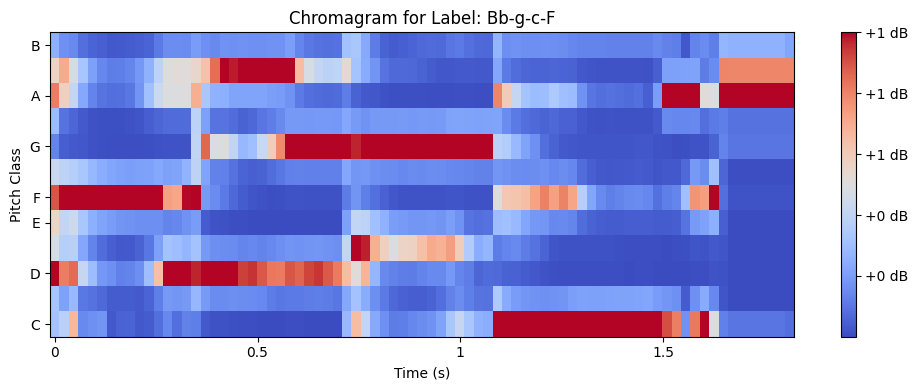

In [22]:
features = np.load('features.npy', allow_pickle=True)
labels = np.load('labels.npy', allow_pickle=True)

def display_feature_and_label(index):
    feature = features[index]
    label = labels[index]
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(
        feature.T, x_axis='time', y_axis='chroma', cmap='coolwarm'
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Chromagram for Label: {label}')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch Class')
    plt.tight_layout()
    plt.show()

index_to_display = 10024
display_feature_and_label(index_to_display)